In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Zad


Dla poniższych danych 

 * znajdż optymalną ilość wymiaów i zredukuj wymiar danyc
 * ponadto zmniejsz wymiar danych do 2 i zwizualizuj dane

In [13]:
samples = pd.read_csv("fish.csv", sep=",",decimal=",")

# print(samples['Species'].drop_duplicates())
samples['Species'] = samples['Species'].replace(['Bream'], 1)
samples['Species'] = samples['Species'].replace(['Roach'], 2)
samples['Species'] = samples['Species'].replace(['Whitefish'], 3)
samples['Species'] = samples['Species'].replace(['Parkki'], 4)
samples['Species'] = samples['Species'].replace(['Perch'], 5)
samples['Species'] = samples['Species'].replace(['Pike'], 6)
samples['Species'] = samples['Species'].replace(['Smelt'], 7)

samples.head()


,Species,Weight,Length,Diagonal,Height,Width
0,1,242,25.4,30,11.52,4.02
1,1,290,26.3,31.2,12.48,4.3056
2,1,340,26.5,31.1,12.3778,4.6961
3,1,363,29,33.5,12.73,4.4555
4,1,430,29,34,12.444,5.134


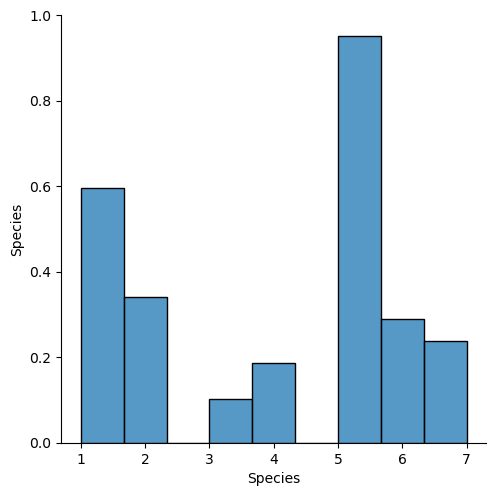

In [15]:
sns.pairplot(data=samples, height=5)
plt.show()

In [33]:
X = samples.drop('Species',1).values
X


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_24503/455067899.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = samples.drop('Species',1).values


array([['242', '25.4', '30', '11.52', '4.02'],
       ['290', '26.3', '31.2', '12.48', '4.3056'],
       ['340', '26.5', '31.1', '12.3778', '4.6961'],
       ['363', '29', '33.5', '12.73', '4.4555'],
       ['430', '29', '34', '12.444', '5.134'],
       ['450', '29.7', '34.7', '13.6024', '4.9274'],
       ['500', '29.7', '34.5', '14.1795', '5.2785'],
       ['390', '30', '35', '12.67', '4.69'],
       ['450', '30', '35.1', '14.0049', '4.8438'],
       ['500', '30.7', '36.2', '14.2266', '4.9594'],
       ['475', '31', '36.2', '14.2628', '5.1042'],
       ['500', '31', '36.2', '14.3714', '4.8146'],
       ['500', '31.5', '36.4', '13.7592', '4.368'],
       ['340', '32', '37.3', '13.9129', '5.0728'],
       ['600', '32', '37.2', '14.9544', '5.1708'],
       ['600', '32', '37.2', '15.438', '5.58'],
       ['700', '33', '38.3', '14.8604', '5.2854'],
       ['700', '33', '38.5', '14.938', '5.1975'],
       ['610', '33.5', '38.6', '15.633', '5.1338'],
       ['650', '33.5', '38.7', '14.4738',

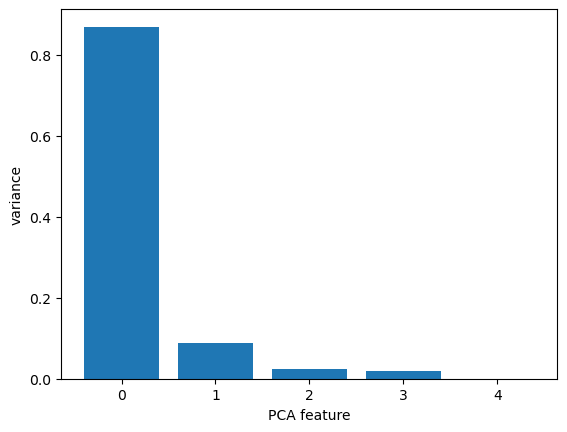

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
model = PCA()
pca_features = model.fit_transform(X_std)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Odpowiedź: 3 wymiary są wystarczające

# Zad
Zwizualizuj dane w 2D

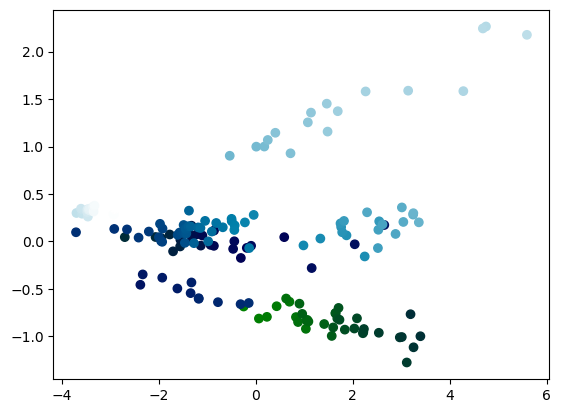

In [27]:
pca_2 = PCA(2)
pca_2_features = pca_2.fit_transform(X_std)

xs = pca_2_features[:,0]
ys = pca_2_features[:,1]
colors = cm.ocean(np.linspace(0, 1, len(ys)))
plt.scatter(xs, ys, c=colors)
plt.show()

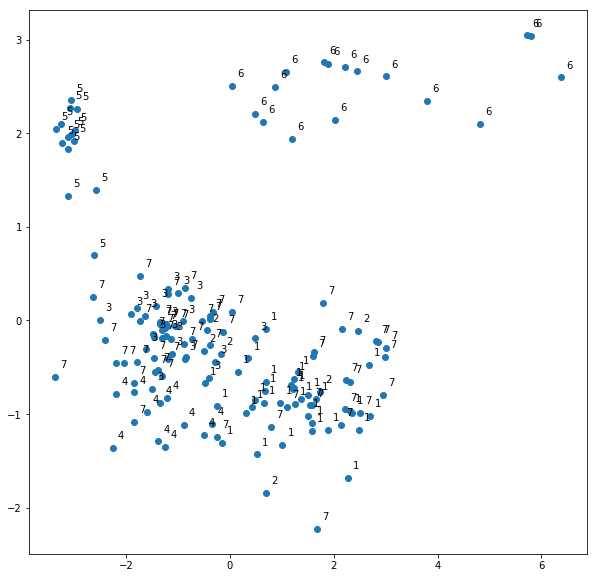

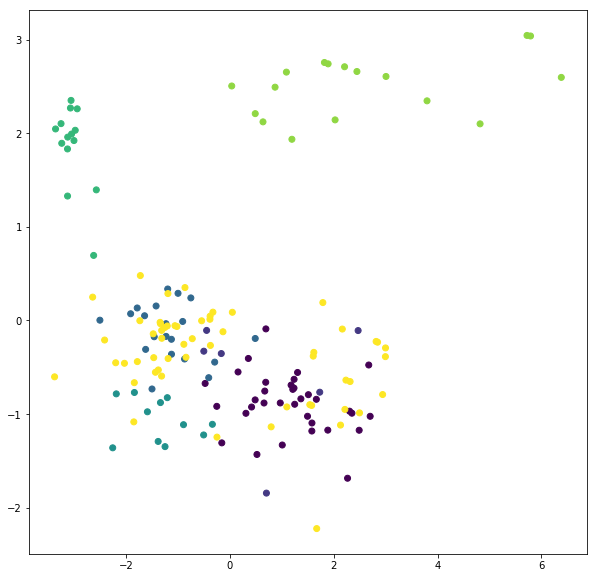